<a href="https://colab.research.google.com/github/ancestor9/Data-Analyst-with-Gemini-/blob/main/5%EC%9D%BC%EC%B0%A8/Decision_Tree_Ensemble.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tree based classification 이해 및 실습

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
import warnings
warnings.filterwarnings(action='ignore')

# <font color='orange'> A. 머신러닝 학습 프로세스

## 1. 목적정의
### 정확도(Accuracy)를 평가지표로 예측 모형 선정

## 2. 자료 정제 분석
### 자료 확보

In [2]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

# 3. 특성변수
## 부적합에 영향을 미치는 변수 선정
### 'worst smoothness', 'worst perimeter' 2개의 특성변수로  'target'을 예측

In [ ]:
X, y = load_breast_cancer(return_X_y=True, as_frame=True)
df = X.merge(y, left_index=True, right_index=True)
df.target.value_counts()
df.target.value_counts(normalize=True)
df.target = df.target.replace({0:1, 1:0})
data =df[['worst smoothness', 'worst perimeter', 'target']]
data

1    357
0    212
Name: target, dtype: int64

1    0.627417
0    0.372583
Name: target, dtype: float64

,worst smoothness,worst perimeter,target
0,0.16220,184.60,1
1,0.12380,158.80,1
2,0.14440,152.50,1
3,0.20980,98.87,1
4,0.13740,152.20,1
...,...,...,...
564,0.14100,166.10,1
565,0.11660,155.00,1
566,0.11390,126.70,1
567,0.16500,184.60,1


# 4. 모형 평가
## 모형의 정확도를 기준(Accuracy)

In [ ]:
from sklearn.preprocessing import StandardScaler

data =df[['worst smoothness', 'worst perimeter', 'target']]
X = data.drop('target', axis=1)
#scaler = StandardScaler()
#data.loc[:, 'worst smoothness' : 'worst perimeter'] = scaler.fit_transform(X)
X = data.drop('target', axis=1); y = data['target']

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import ensemble
from mlxtend.plotting import plot_decision_regions # 2차원 특성변수의 분류경계선을 시각

clfs = [KNeighborsClassifier(), LogisticRegression(),  GaussianNB(),
        SVC(), DecisionTreeClassifier(), ensemble.RandomForestClassifier()]

KNeighborsClassifier()모형d의 정확도 0.93


<AxesSubplot:>

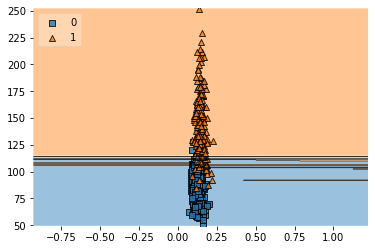

LogisticRegression()모형d의 정확도 0.92


<AxesSubplot:>

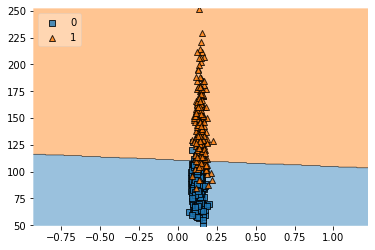

GaussianNB()모형d의 정확도 0.95


<AxesSubplot:>

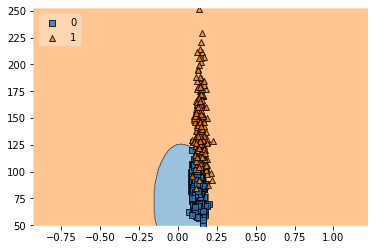

SVC()모형d의 정확도 0.92


<AxesSubplot:>

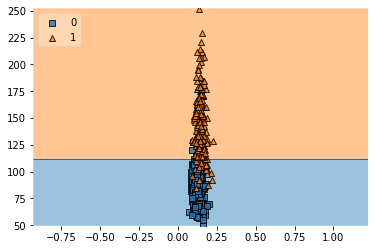

DecisionTreeClassifier()모형d의 정확도 1.0


<AxesSubplot:>

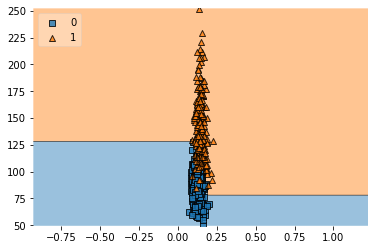

RandomForestClassifier()모형d의 정확도 1.0


<AxesSubplot:>

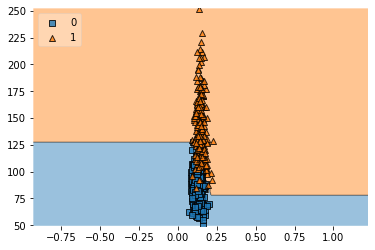

In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')

for i, clf in enumerate(clfs) :
  y_pred = clf.fit(X,y).predict(X)
  print(f'{clf}모형d의 정확도 {metrics.accuracy_score(y_pred, y).round(2)}')
  plot_decision_regions(X.values, y.values, clf=clf, legend=2)
  plt.show()

# <font color='blue'> B. Decision Tree 알고리즘
## 1. 데이터 확보(50개의 sample 데이터)

0    34
1    16
Name: target, dtype: int64

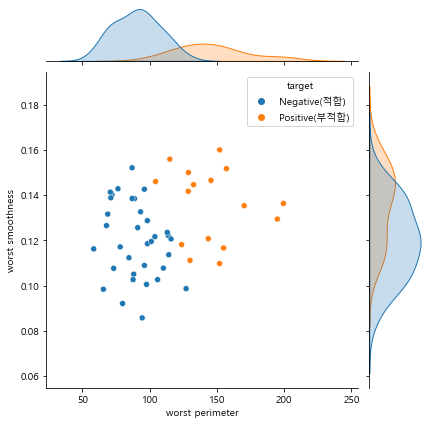

In [ ]:
import seaborn as sns
plt.rcParams['font.family']='Malgun Gothic' # 한글폰트
plt.rcParams['axes.unicode_minus'] = False
data = data.sample(50, random_state= 1024)
data.target.value_counts()
data.target = data.target.replace({0: 'Negative(적합)', 1: 'Positive(부적합)'})
sns.jointplot(data=data, y='worst smoothness', x='worst perimeter', hue='target')

## 2. Pruning methods
## Level 1 - Stump

DecisionTreeClassifier(max_depth=1, random_state=11)

<Figure size 576x432 with 0 Axes>

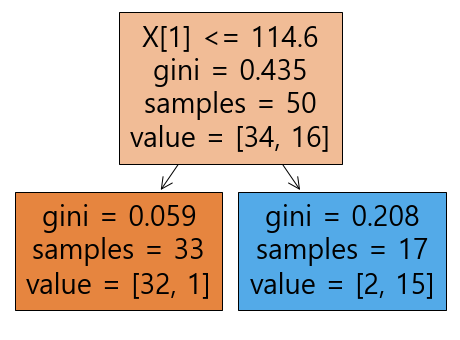

In [ ]:
from sklearn.tree import plot_tree

X = data.drop('target', 1)
y = data.target

dt = DecisionTreeClassifier(max_depth=1, random_state=11)
dt.fit(X, y)

plt.figure(figsize=(8,6))
ax = plot_tree(dt, filled=True)

In [ ]:
15/16


0.9375

## Level 2

DecisionTreeClassifier(max_depth=2, random_state=11)

<Figure size 720x576 with 0 Axes>

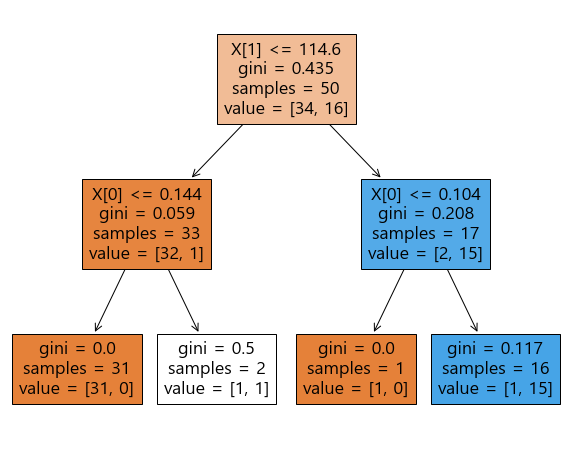

In [ ]:
dt = DecisionTreeClassifier(max_depth=2, random_state=11)

dt.fit(X, y)
plt.figure(figsize=(10,8))

ax = plot_tree(dt, filled=True)

## Level 4 - Overfitting

DecisionTreeClassifier(random_state=11)

<Figure size 576x432 with 0 Axes>

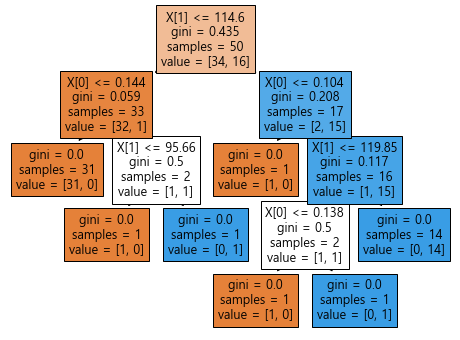

In [ ]:
X = data.drop('target', axis=1); y = data['target']

dt = DecisionTreeClassifier(random_state=11)
dt.fit(X, y)

plt.figure(figsize=(8,6))
ax = plot_tree(dt, filled=True)

## Nicolas de Condorcet’s Jury Theorm

<Figure size 1440x576 with 0 Axes>

Text(0.5, 0, '재판회수')

Text(0, 0.5, '5명의 배심원 판결')

(array([-200.,    0.,  200.,  400.,  600.,  800., 1000., 1200.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

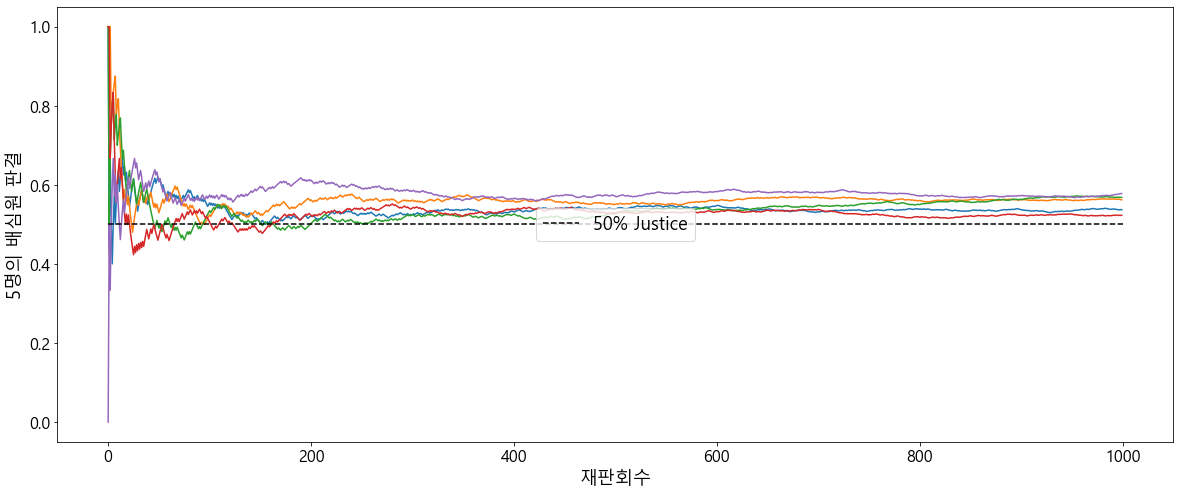

In [ ]:
import numpy as np
jurors_proba = 0.55 ; num_jurors = 5; num_trals = 1000
num_decisions=(np.random.rand(num_trals, num_jurors)<jurors_proba)*1
total_trials = np.arange(1, num_trals+1).reshape(-1, 1)
cum_right_ratio=np.cumsum(num_decisions, axis=0)/total_trials
plt.figure(figsize=(20,8)); plt.plot(cum_right_ratio)
plt.plot([0, num_trals], [0.5, 0.5], 'k--', label='50% Justice')

plt.xlabel('재판회수', fontsize= '18'); plt.ylabel('5명의 배심원 판결', fontsize= '18')
plt.xticks(fontsize= '16');plt.yticks(fontsize= '16')

plt.legend(fontsize=18, loc='center')

# <font color='blue'> C. 앙상블 모형(Ensemble)
## 전체 데이터 확보(모든 변수 사용)
    
## 1. Decision Tree 모형

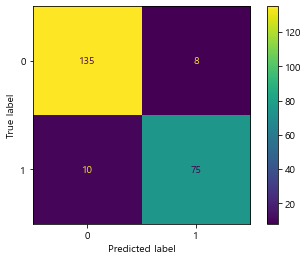

              precision    recall  f1-score   support

           0       0.93      0.94      0.94       143
           1       0.90      0.88      0.89        85

    accuracy                           0.92       228
   macro avg       0.92      0.91      0.92       228
weighted avg       0.92      0.92      0.92       228



In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop('target', 1); y = df['target']
X_train, X_test, y_train, y_test=train_test_split(X, y,
                                                  test_size=0.4,
                                                  stratify= y, random_state=11)

from sklearn.metrics import plot_confusion_matrix, classification_report

dt = DecisionTreeClassifier(random_state=11)
y_predict = dt.fit(X_train, y_train).predict(X_test)

plot_confusion_matrix(dt, X_test, y_test); plt.show()
print(classification_report(y_test, y_predict))

In [ ]:
(135+75)/228

0.9210526315789473

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 11,
 'splitter': 'best'}

<Figure size 576x432 with 0 Axes>

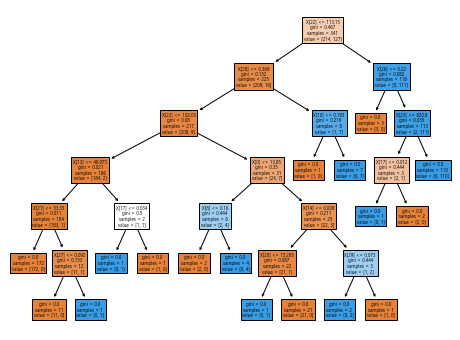

In [ ]:
dt.get_params()
plt.figure(figsize=(8,6))
ax = plot_tree(dt, filled=True)

### bias_variance_decomp: Bias-variance decomposition for classification and regression losses
- http://rasbt.github.io/mlxtend/user_guide/evaluate/bias_variance_decomp/

In [ ]:
from mlxtend.evaluate import bias_variance_decomp

avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        dt, X_train.values, y_train.values, X_test.values, y_test.values,
        loss='0-1_loss',
        random_seed=123)

print('Average expected loss: %.3f' % avg_expected_loss)
print('Average bias: %.3f' % avg_bias)
print('Average variance: %.3f' % avg_var)

Average expected loss: 0.087
Average bias: 0.070
Average variance: 0.062


In [ ]:
list(df.columns).remove('target')

In [ ]:
my_list = df.columns.tolist()
my_list.remove('target')
my_list

['mean radius',
 'mean texture',
 'mean perimeter',
 'mean area',
 'mean smoothness',
 'mean compactness',
 'mean concavity',
 'mean concave points',
 'mean symmetry',
 'mean fractal dimension',
 'radius error',
 'texture error',
 'perimeter error',
 'area error',
 'smoothness error',
 'compactness error',
 'concavity error',
 'concave points error',
 'symmetry error',
 'fractal dimension error',
 'worst radius',
 'worst texture',
 'worst perimeter',
 'worst area',
 'worst smoothness',
 'worst compactness',
 'worst concavity',
 'worst concave points',
 'worst symmetry',
 'worst fractal dimension']

In [ ]:
np.random.choice(my_list, 6)

array(['mean compactness', 'perimeter error', 'symmetry error',
       'worst fractal dimension', 'compactness error', 'mean smoothness'],
      dtype='<U23')

In [ ]:
def average_dt(df):
    my_list = df.columns.tolist()
    my_list.remove('target')
    number = np.sqrt(len(my_list)).astype('int') # 원래변수의

    X = df[list(np.random.choice(my_list, number))]; y = df['target']
    X_train, X_test, y_train, y_test=train_test_split(X, y,
                                                      test_size=0.4,
                                                      stratify= y, random_state=11)
    dt = DecisionTreeClassifier(random_state=11, max_depth = 2)
    dt.fit(X_train, y_train).predict(X_test)

    plt.figure(figsize=(12,8))
    ax = plot_tree(dt, filled=True)

    return ax

[Text(0.5, 0.8333333333333334, 'X[3] <= 0.103\ngini = 0.467\nsamples = 341\nvalue = [214, 127]'),
 Text(0.25, 0.5, 'X[3] <= 0.072\ngini = 0.177\nsamples = 224\nvalue = [202, 22]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.082\nsamples = 187\nvalue = [179, 8]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.47\nsamples = 37\nvalue = [23, 14]'),
 Text(0.75, 0.5, 'X[1] <= 16.495\ngini = 0.184\nsamples = 117\nvalue = [12, 105]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.498\nsamples = 17\nvalue = [8, 9]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.077\nsamples = 100\nvalue = [4, 96]')]

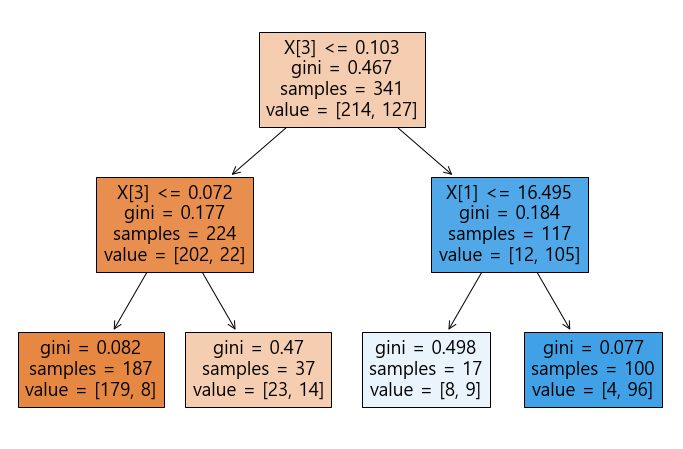

In [ ]:
average_dt(df)

## 2. Bagging 모형

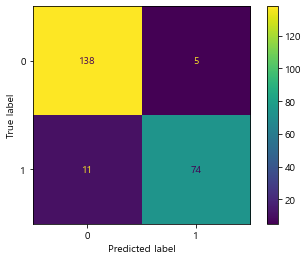

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       143
           1       0.94      0.87      0.90        85

    accuracy                           0.93       228
   macro avg       0.93      0.92      0.92       228
weighted avg       0.93      0.93      0.93       228



In [ ]:
import numpy as np
np.random.seed(1357)

bag = ensemble.BaggingClassifier(dt, n_estimators = 30, max_samples =0.8)
y_predict = bag.fit(X_train, y_train).predict(X_test)
plot_confusion_matrix(bag, X_test, y_test); plt.show()
print(classification_report(y_test, y_predict))

In [ ]:
(138+74)/228

0.9298245614035088

In [ ]:
avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        bag, X_train.values, y_train.values, X_test.values, y_test.values,
        loss='0-1_loss',
        random_seed=123)

print('Average expected loss: %.3f' % avg_expected_loss)
print('Average bias: %.3f' % avg_bias)
print('Average variance: %.3f' % avg_var)

Average expected loss: 0.066
Average bias: 0.061
Average variance: 0.045


시뮬레이션 평균 정확도  0.9335099999999996


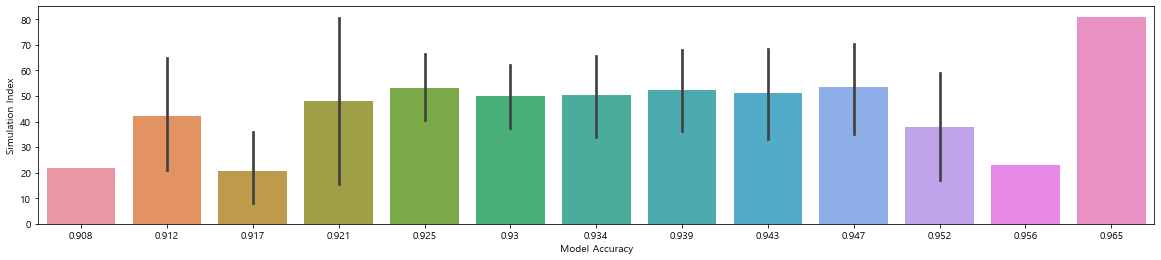

In [ ]:
import pandas as pd

acc_list = []
recall_list = []

for i in np.random.choice(2500, 100, replace=False) :
    clf = ensemble.BaggingClassifier(dt, n_estimators = 10, max_samples =0.8, random_state = i)
    preds =  clf.fit(X_train, y_train).predict(X_test)
    acc = round(metrics.accuracy_score(y_true = y_test, y_pred = preds), 3)
    recall = metrics.recall_score(y_true = y_test, y_pred = preds, average='macro')

    acc_list.append(acc)
    recall_list.append(recall)

data = (pd.Series(acc_list).reset_index().
        rename(columns={'index': 'Simulation Index', 0: 'Model Accuracy'}))
print('시뮬레이션 평균 정확도 ', data['Model Accuracy'].mean())

fig, ax = plt.subplots()
fig.set_size_inches(20, 4)
ax = sns.barplot(x='Model Accuracy', y='Simulation Index', data=data)

## 3. Random forest 모형

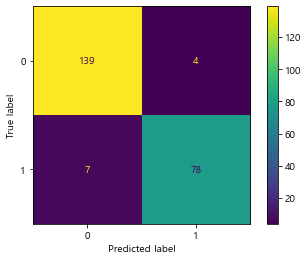

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       143
           1       0.95      0.92      0.93        85

    accuracy                           0.95       228
   macro avg       0.95      0.94      0.95       228
weighted avg       0.95      0.95      0.95       228



In [ ]:
np.random.seed(4321)
rf = ensemble.RandomForestClassifier(random_state=11)
y_predict = rf.fit(X_train, y_train).predict(X_test)
plot_confusion_matrix(rf, X_test, y_test); plt.show()
print(classification_report(y_test, y_predict))

In [ ]:
(139+78)/228

0.9517543859649122

In [ ]:
avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        rf, X_train.values, y_train.values, X_test.values, y_test.values,
        loss='0-1_loss',
        random_seed=123)

print('Average expected loss: %.3f' % avg_expected_loss)
print('Average bias: %.3f' % avg_bias)
print('Average variance: %.3f' % avg_var)

Average expected loss: 0.050
Average bias: 0.044
Average variance: 0.025


In [ ]:
y_proba = rf.predict_proba(X_test)
print(f'정확도(accuracy): {metrics.accuracy_score(y_test, y_predict)}')
print(f'AUROC: {metrics.roc_auc_score(y_test, y_proba[:, 1])}')
print(f'AP: {metrics.average_precision_score(y_test, y_proba[:, 1])}')

정확도(accuracy): 0.9517543859649122
AUROC: 0.9949814890991362
AP: 0.9919383436545025


시뮬레이션 평균 정확도  0.9488199999999997


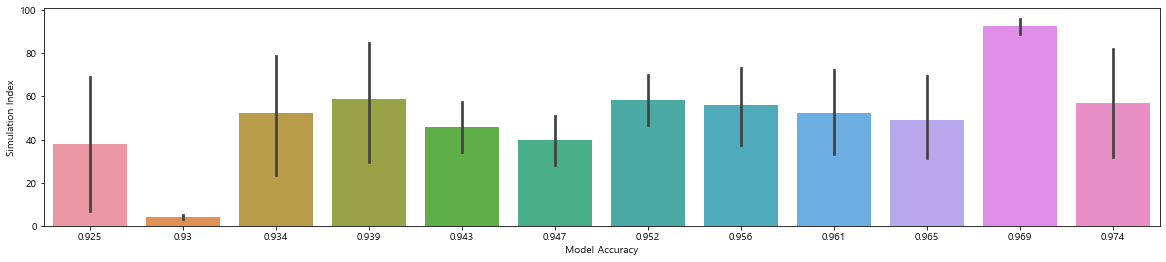

In [ ]:
acc_list = []
recall_list = []

for i in np.random.choice(2500, 100, replace=False) :
    clf = ensemble.RandomForestClassifier(n_estimators = 10, random_state = i)
    preds =  clf.fit(X_train, y_train).predict(X_test)
    acc = round(metrics.accuracy_score(y_true = y_test, y_pred = preds), 3)
    recall = metrics.recall_score(y_true = y_test, y_pred = preds, average='macro')

    acc_list.append(acc)
    recall_list.append(recall)

data = (pd.Series(acc_list).reset_index().
        rename(columns={'index': 'Simulation Index', 0: 'Model Accuracy'}))
print('시뮬레이션 평균 정확도 ', data['Model Accuracy'].mean())

fig, ax = plt.subplots()
fig.set_size_inches(20, 4)
ax = sns.barplot(x='Model Accuracy', y='Simulation Index', data=data)

시뮬레이션 평균 검측율  0.9386297819827228


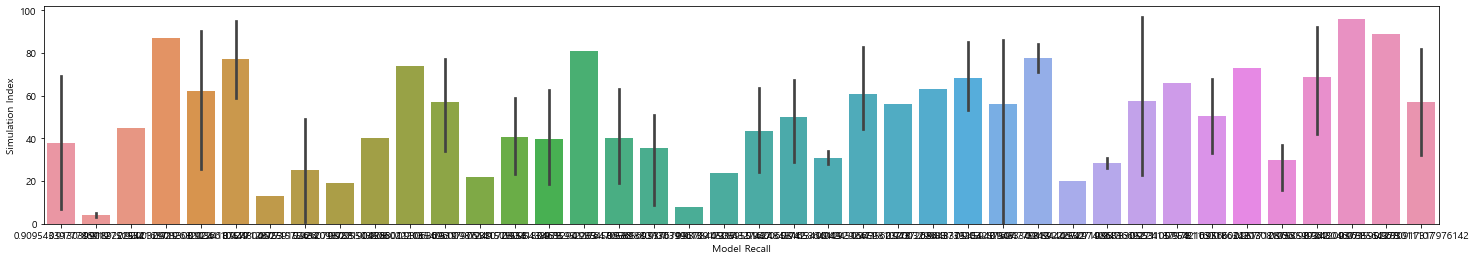

In [ ]:
data = (pd.Series(recall_list).reset_index().
        rename(columns={'index': 'Simulation Index', 0: 'Model Recall'}))
print('시뮬레이션 평균 검측율 ', data['Model Recall'].mean())

fig, ax = plt.subplots()
fig.set_size_inches(25, 4)
ax = sns.barplot(x='Model Recall', y='Simulation Index', data=data)

## 4. Extra 의사결정 모형

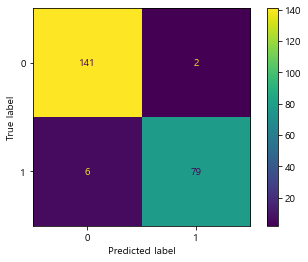

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       143
           1       0.98      0.93      0.95        85

    accuracy                           0.96       228
   macro avg       0.97      0.96      0.96       228
weighted avg       0.97      0.96      0.96       228



In [ ]:
extree = ensemble.ExtraTreesClassifier(random_state=0)
y_predict = extree.fit(X_train, y_train).predict(X_test)
y_proba = extree.predict_proba(X_test)
plot_confusion_matrix(extree, X_test, y_test); plt.show()
print(classification_report(y_test, y_predict))

In [ ]:
print(f'정확도(accuracy): {metrics.accuracy_score(y_test, y_predict)}')
print(f'AUROC: {metrics.roc_auc_score(y_test, y_proba[:, 1])}')
print(f'AP: {metrics.average_precision_score(y_test, y_proba[:, 1])}')

정확도(accuracy): 0.9649122807017544
AUROC: 0.9962978198272316
AP: 0.993879620436114


In [ ]:
def to_labels(pos_probs, threshold):
    return (pos_probs >= threshold).astype('int')

p, r, thresholds = metrics.precision_recall_curve(y_test, y_proba[:, 1])
scores = [np.sum(to_labels(y_proba[:, 1], t))/len(y_proba[:, 1]) for t in thresholds]

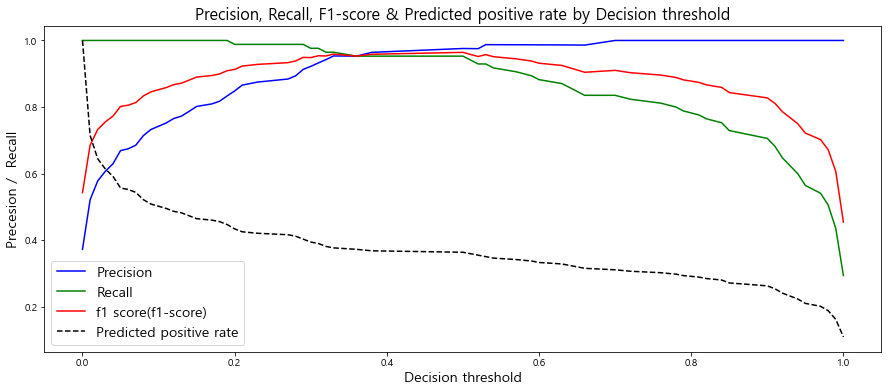

In [ ]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.rcParams["figure.figsize"] = (15,6)
    plt.rcParams['font.family']='Malgun Gothic' # 한글폰트
    plt.title('Precision, Recall, F1-score & Predicted positive rate by Decision threshold', fontsize='16')
    plt.plot(thresholds, precisions[:-1], 'b-', label='Precision') # 판사
    plt.plot(thresholds, recalls[:-1], 'g-', label='Recall') # 검사
    plt.plot(thresholds, (2*precisions[:-1]*recalls[:-1])/(precisions[:-1] +recalls[:-1]),
             'r-', label='f1 score(f1-score)') # 변호사
    plt.plot(thresholds, scores, 'k--', label='Predicted positive rate') # q-ratio
    plt.ylabel('Precesion /  Recall', fontsize='14')
    plt.xlabel('Decision threshold', fontsize='14')
    plt.legend(loc='best', fontsize='14')

    plt.show()

plot_precision_recall_vs_threshold(p, r, thresholds)

# End

## Classifier comparison
- https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html

In [ ]:
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

Text(0.5, 1.0, 'Input data')

(-1.818500344394381, 2.6813716830490253)

(-1.5357020680498332, 2.071899312714103)

[]

[]

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

(-1.818500344394381, 2.6813716830490253)

(-1.5357020680498332, 2.071899312714103)

[]

[]

Text(0.5, 1.0, 'LogisticRegression')

Text(2.3813716830490255, -1.2357020680498332, '.88')

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=1))])

(-1.818500344394381, 2.6813716830490253)

(-1.5357020680498332, 2.071899312714103)

[]

[]

Text(0.5, 1.0, 'DecisionTree(depth=1)')

Text(2.3813716830490255, -1.2357020680498332, '.75')

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('baggingclassifier',
                 BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=5),
                                   max_samples=0.8))])

(-1.818500344394381, 2.6813716830490253)

(-1.5357020680498332, 2.071899312714103)

[]

[]

Text(0.5, 1.0, 'Bagging')

Text(2.3813716830490255, -1.2357020680498332, '.95')

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=5, max_features=1,
                                        n_estimators=10))])

(-1.818500344394381, 2.6813716830490253)

(-1.5357020680498332, 2.071899312714103)

[]

[]

Text(0.5, 1.0, 'Random Forest')

Text(2.3813716830490255, -1.2357020680498332, '.97')

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('extratreesclassifier', ExtraTreesClassifier())])

(-1.818500344394381, 2.6813716830490253)

(-1.5357020680498332, 2.071899312714103)

[]

[]

Text(0.5, 1.0, 'ExtraTree')

Text(2.3813716830490255, -1.2357020680498332, '.95')

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('adaboostclassifier', AdaBoostClassifier())])

(-1.818500344394381, 2.6813716830490253)

(-1.5357020680498332, 2.071899312714103)

[]

[]

Text(0.5, 1.0, 'AdaBoost')

Text(2.3813716830490255, -1.2357020680498332, '.93')

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gradientboostingclassifier', GradientBoostingClassifier())])

(-1.818500344394381, 2.6813716830490253)

(-1.5357020680498332, 2.071899312714103)

[]

[]

Text(0.5, 1.0, 'GraidentBoost')

Text(2.3813716830490255, -1.2357020680498332, '.95')

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('lgbmclassifier', LGBMClassifier())])

(-1.818500344394381, 2.6813716830490253)

(-1.5357020680498332, 2.071899312714103)

[]

[]

Text(0.5, 1.0, 'LGBMClassifier')

Text(2.3813716830490255, -1.2357020680498332, '.85')

[10:21:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('xgbclassifier',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, enable_categorical=False,
                               gamma=0, gpu_id=-1, importance_type=None,
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=6, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=12, num_parallel_tree=1, predictor='auto',
                               random_state=0, reg_alpha=0, reg_lambda=1,
                               scale_pos_weight=1, subsample=1,
                               tree_method='exact', validate_parameters=1,
                               verbosity=None))])

(-1.818500344394381, 2.6813716830490253)

(-1.5357020680498332, 2.071899312714103)

[]

[]

Text(0.5, 1.0, 'XGBClassifier')

Text(2.3813716830490255, -1.2357020680498332, '.85')

(-1.6318489313792643, 1.6298079636035776)

(-1.7894269424127711, 1.5730603182233371)

[]

[]

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

(-1.6318489313792643, 1.6298079636035776)

(-1.7894269424127711, 1.5730603182233371)

[]

[]

Text(1.3298079636035776, -1.489426942412771, '.40')

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=1))])

(-1.6318489313792643, 1.6298079636035776)

(-1.7894269424127711, 1.5730603182233371)

[]

[]

Text(1.3298079636035776, -1.489426942412771, '.65')

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('baggingclassifier',
                 BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=5),
                                   max_samples=0.8))])

(-1.6318489313792643, 1.6298079636035776)

(-1.7894269424127711, 1.5730603182233371)

[]

[]

Text(1.3298079636035776, -1.489426942412771, '.75')

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=5, max_features=1,
                                        n_estimators=10))])

(-1.6318489313792643, 1.6298079636035776)

(-1.7894269424127711, 1.5730603182233371)

[]

[]

Text(1.3298079636035776, -1.489426942412771, '.85')

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('extratreesclassifier', ExtraTreesClassifier())])

(-1.6318489313792643, 1.6298079636035776)

(-1.7894269424127711, 1.5730603182233371)

[]

[]

Text(1.3298079636035776, -1.489426942412771, '.85')

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('adaboostclassifier', AdaBoostClassifier())])

(-1.6318489313792643, 1.6298079636035776)

(-1.7894269424127711, 1.5730603182233371)

[]

[]

Text(1.3298079636035776, -1.489426942412771, '.82')

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gradientboostingclassifier', GradientBoostingClassifier())])

(-1.6318489313792643, 1.6298079636035776)

(-1.7894269424127711, 1.5730603182233371)

[]

[]

Text(1.3298079636035776, -1.489426942412771, '.75')

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('lgbmclassifier', LGBMClassifier())])

(-1.6318489313792643, 1.6298079636035776)

(-1.7894269424127711, 1.5730603182233371)

[]

[]

Text(1.3298079636035776, -1.489426942412771, '.65')

[10:21:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('xgbclassifier',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, enable_categorical=False,
                               gamma=0, gpu_id=-1, importance_type=None,
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=6, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=12, num_parallel_tree=1, predictor='auto',
                               random_state=0, reg_alpha=0, reg_lambda=1,
                               scale_pos_weight=1, subsample=1,
                               tree_method='exact', validate_parameters=1,
                               verbosity=None))])

(-1.6318489313792643, 1.6298079636035776)

(-1.7894269424127711, 1.5730603182233371)

[]

[]

Text(1.3298079636035776, -1.489426942412771, '.75')

(-2.301737447070235, 3.6087431161656847)

(0.06802498168359294, 4.392677587182645)

[]

[]

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

(-2.301737447070235, 3.6087431161656847)

(0.06802498168359294, 4.392677587182645)

[]

[]

Text(3.308743116165685, 0.36802498168359293, '.95')

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=1))])

(-2.301737447070235, 3.6087431161656847)

(0.06802498168359294, 4.392677587182645)

[]

[]

Text(3.308743116165685, 0.36802498168359293, '.93')

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('baggingclassifier',
                 BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=5),
                                   max_samples=0.8))])

(-2.301737447070235, 3.6087431161656847)

(0.06802498168359294, 4.392677587182645)

[]

[]

Text(3.308743116165685, 0.36802498168359293, '.95')

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=5, max_features=1,
                                        n_estimators=10))])

(-2.301737447070235, 3.6087431161656847)

(0.06802498168359294, 4.392677587182645)

[]

[]

Text(3.308743116165685, 0.36802498168359293, '.93')

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('extratreesclassifier', ExtraTreesClassifier())])

(-2.301737447070235, 3.6087431161656847)

(0.06802498168359294, 4.392677587182645)

[]

[]

Text(3.308743116165685, 0.36802498168359293, '.95')

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('adaboostclassifier', AdaBoostClassifier())])

(-2.301737447070235, 3.6087431161656847)

(0.06802498168359294, 4.392677587182645)

[]

[]

Text(3.308743116165685, 0.36802498168359293, '.95')

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gradientboostingclassifier', GradientBoostingClassifier())])

(-2.301737447070235, 3.6087431161656847)

(0.06802498168359294, 4.392677587182645)

[]

[]

Text(3.308743116165685, 0.36802498168359293, '.95')

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('lgbmclassifier', LGBMClassifier())])

(-2.301737447070235, 3.6087431161656847)

(0.06802498168359294, 4.392677587182645)

[]

[]

Text(3.308743116165685, 0.36802498168359293, '.95')

[10:21:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('xgbclassifier',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, enable_categorical=False,
                               gamma=0, gpu_id=-1, importance_type=None,
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=6, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=12, num_parallel_tree=1, predictor='auto',
                               random_state=0, reg_alpha=0, reg_lambda=1,
                               scale_pos_weight=1, subsample=1,
                               tree_method='exact', validate_parameters=1,
                               verbosity=None))])

(-2.301737447070235, 3.6087431161656847)

(0.06802498168359294, 4.392677587182645)

[]

[]

Text(3.308743116165685, 0.36802498168359293, '.95')

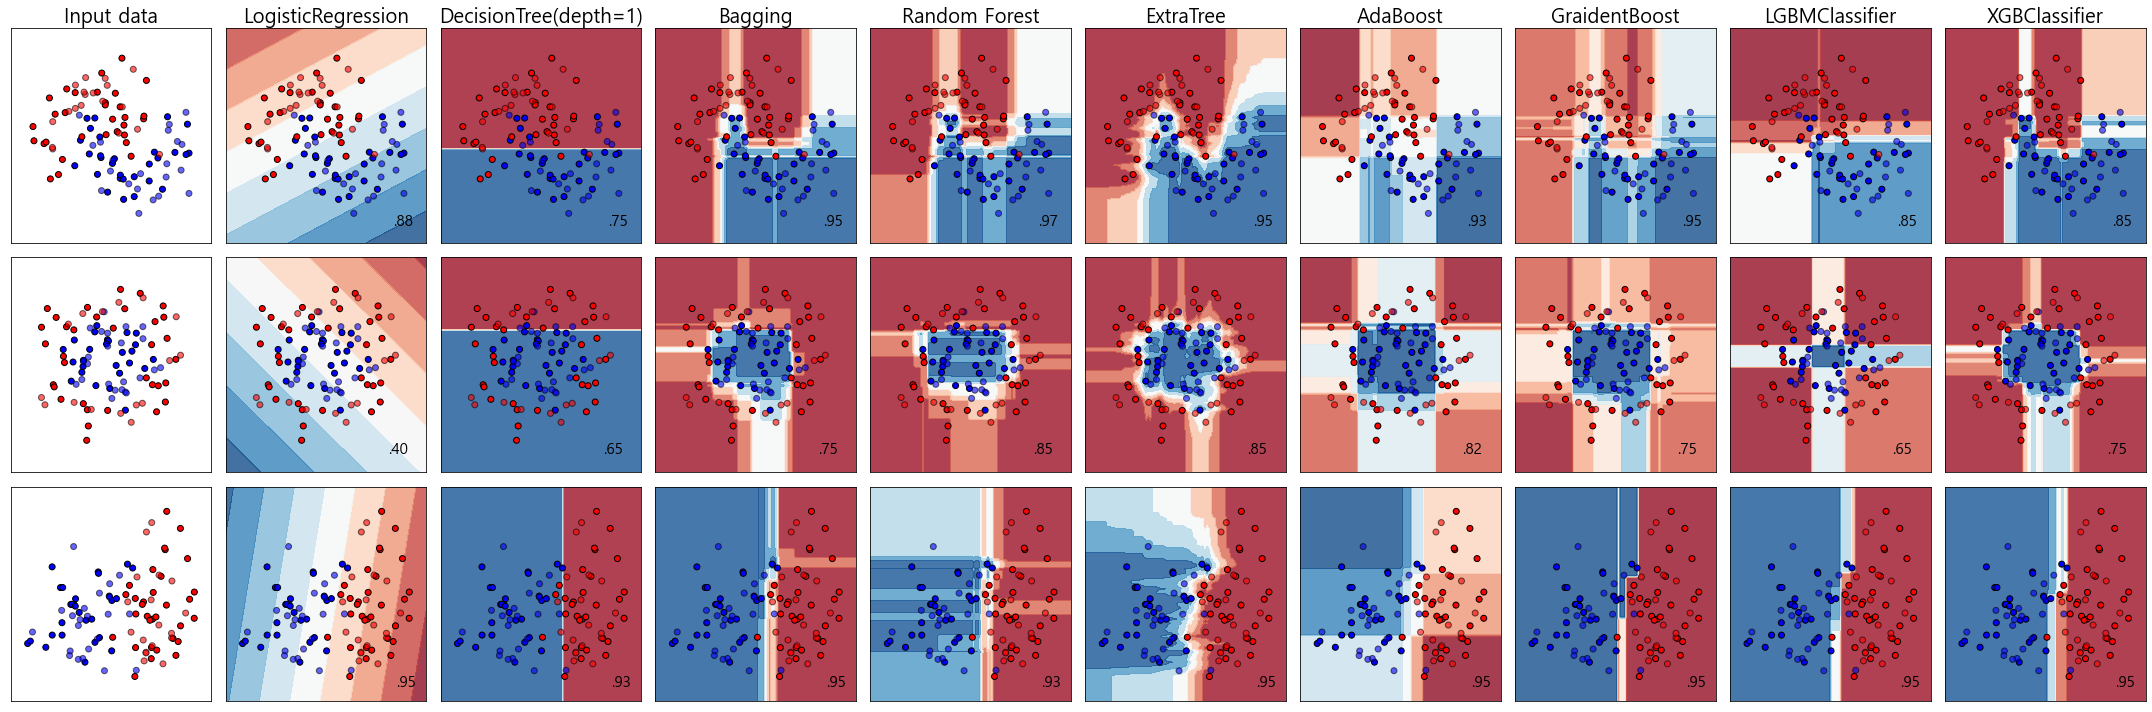

In [ ]:
# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.inspection import DecisionBoundaryDisplay

names = [
    #"Decision Tree(depth=1)", "Decision Tree(depth=2)", "Decision Tree(depth=3)", "Decision Tree(depth=5)",
    "LogisticRegression",
    "DecisionTree(depth=1)",
    "Bagging",
    "Random Forest",
    "ExtraTree",
    "AdaBoost",
    "GraidentBoost",
    "LGBMClassifier",
    "XGBClassifier"
]

classifiers = [
    #DecisionTreeClassifier(max_depth=1), DecisionTreeClassifier(max_depth=2), DecisionTreeClassifier(max_depth=3),
    LogisticRegression(),
    DecisionTreeClassifier(max_depth=1),
    ensemble.BaggingClassifier(DecisionTreeClassifier(max_depth=5), n_estimators = 10, max_samples =0.8),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    ensemble.ExtraTreesClassifier(),
    AdaBoostClassifier(),
    ensemble.GradientBoostingClassifier(),
    LGBMClassifier(),
    XGBClassifier()
]

X, y = make_classification(
    n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1
)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [
    make_moons(noise=0.3, random_state=0),
    make_circles(noise=0.2, factor=0.5, random_state=1),
    linearly_separable,
]

figure = plt.figure(figsize=(30, 10))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=42
    )

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data", fontsize=20)
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
    # Plot the testing points
    ax.scatter(
        X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k"
    )
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)

        clf = make_pipeline(StandardScaler(), clf)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        DecisionBoundaryDisplay.from_estimator(
            clf, X, cmap=cm, alpha=0.8, ax=ax, eps=0.5
        )

        # Plot the training points
        ax.scatter(
            X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k"
        )
        # Plot the testing points
        ax.scatter(
            X_test[:, 0],
            X_test[:, 1],
            c=y_test,
            cmap=cm_bright,
            edgecolors="k",
            alpha=0.6,
        )

        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name, fontsize=20)
        ax.text(
            x_max - 0.3,
            y_min + 0.3,
            ("%.2f" % score).lstrip("0"),
            size=15,
            horizontalalignment="right",
        )
        i += 1

plt.tight_layout()
plt.show()

### 그림 나누는 방법

9

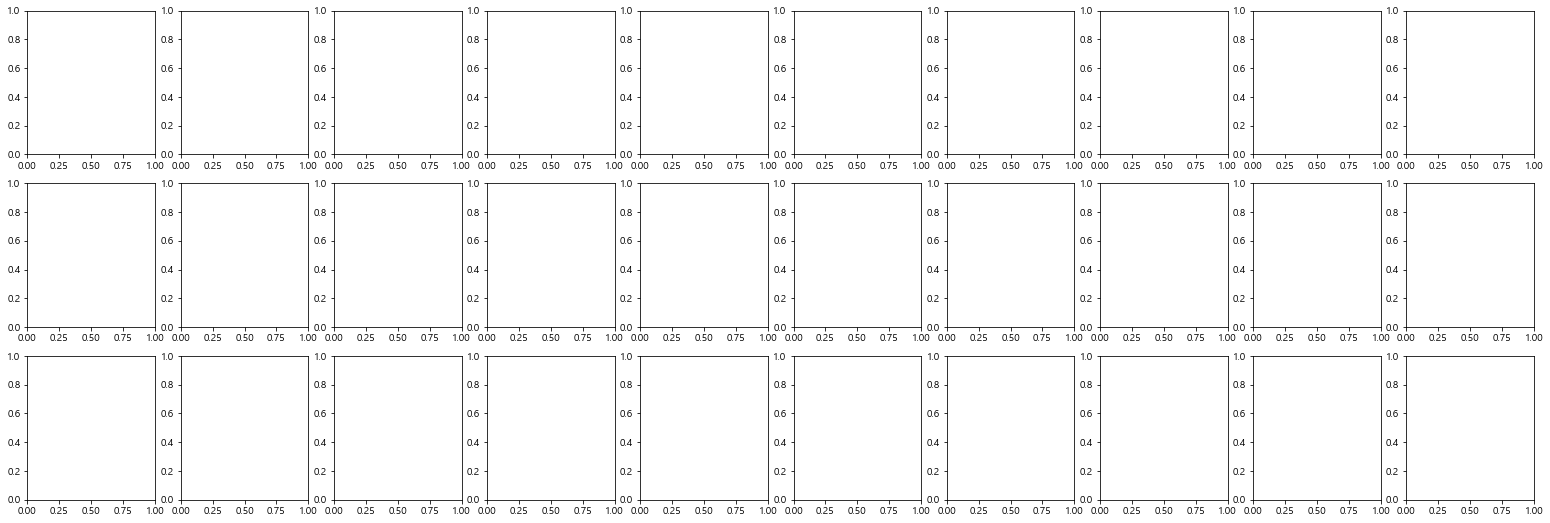

In [ ]:
len(classifiers)
figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    i += 1
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        i += 1

## Fine